# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
air_df = pd.read_csv('data/air_cleaned.csv', low_memory = False)
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51596 entries, 0 to 51595
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                51596 non-null  object 
 1   Investigation.Type      51596 non-null  object 
 2   Accident.Number         51596 non-null  object 
 3   Event.Date              51596 non-null  object 
 4   Location                51585 non-null  object 
 5   Country                 51474 non-null  object 
 6   Latitude                20137 non-null  object 
 7   Longitude               20132 non-null  object 
 8   Airport.Code            31739 non-null  object 
 9   Airport.Name            33153 non-null  object 
 10  Injury.Severity         51596 non-null  object 
 11  Aircraft.damage         51596 non-null  object 
 12  Aircraft.Category       51596 non-null  object 
 13  Registration.Number     51567 non-null  object 
 14  Make                    51596 non-null

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
subset_df = air_df[['make_model', 'Make', 'Model', 'Aircraft.damage', 'is_destroyed', 'ser_inj_frac', 'N_passenger']]

# N_passenger is a possible metric to separate airplanes into smaller vs. larger category
small_planes = subset_df[subset_df['N_passenger'] <= 20]
larger_planes = subset_df[subset_df['N_passenger'] > 20]

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [4]:
best_smallest_makes = small_planes.groupby('Make').mean()['ser_inj_frac'].sort_values().nsmallest(10)
best_larger_makes = larger_planes.groupby('Make').mean()['ser_inj_frac'].sort_values().nsmallest(10)

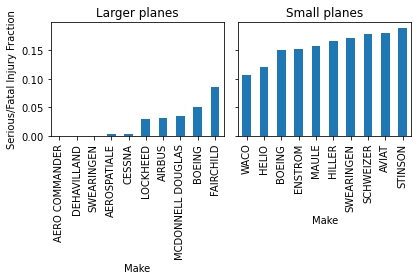

In [5]:
fig, ax = plt.subplots(1,2, sharey = True)
best_larger_makes.plot.bar(ax = ax[0])
ax[0].set_title('Larger planes')
best_smallest_makes.plot.bar(ax = ax[1])
ax[1].set_title('Small planes')
ax[0].set_ylabel('Serious/Fatal Injury Fraction')
plt.tight_layout()


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

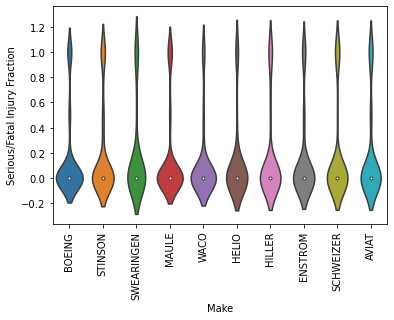

In [6]:
bestsmallplanes_selected = small_planes[small_planes['Make'].isin(best_smallest_makes.index)]
fig, ax = plt.subplots()
sns.violinplot(x = 'Make', y = 'ser_inj_frac', data = bestsmallplanes_selected, ax = ax)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Serious/Fatal Injury Fraction')


**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

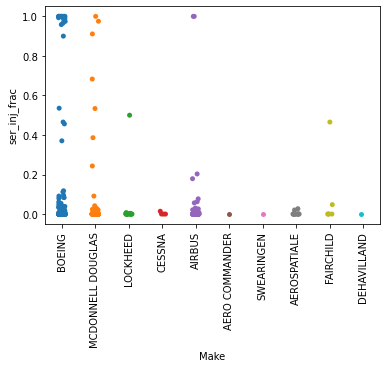

In [7]:
bestlargeplanes_selected = larger_planes[larger_planes['Make'].isin(best_larger_makes.index)]
fig, ax = plt.subplots()
sns.stripplot(x = 'Make', y = 'ser_inj_frac', data = bestlargeplanes_selected, ax = ax)
ax.tick_params(axis='x', rotation=90)

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [8]:
larger_planes.groupby('Make').mean()['is_destroyed'].sort_values().nsmallest(15)

Make
AERO COMMANDER       0.000000
DEHAVILLAND          0.000000
SWEARINGEN           0.000000
AEROSPATIALE         0.000000
AIRBUS               0.035294
MCDONNELL DOUGLAS    0.054422
BOEING               0.057279
BRITISH AEROSPACE    0.090909
EMBRAER              0.093023
DOUGLAS              0.102564
LOCKHEED             0.117647
DE HAVILLAND         0.160000
CESSNA               0.250000
FAIRCHILD            0.333333
BEECH                0.444444
Name: is_destroyed, dtype: float64

In [9]:
small_planes.groupby('Make').mean()['is_destroyed'].sort_values().nsmallest(15)

Make
AMERICAN CHAMPION AIRCRAFT    0.022727
DIAMOND AIRCRAFT IND INC      0.030769
DEHAVILLAND                   0.035294
AVIAT                         0.058537
WACO                          0.072581
MAULE                         0.091858
LUSCOMBE                      0.094395
BOEING                        0.100410
TAYLORCRAFT                   0.107843
STINSON                       0.111421
BURKHART GROB                 0.125000
AERONCA                       0.129094
GLOBE                         0.130435
HELIO                         0.141176
CHAMPION                      0.141487
Name: is_destroyed, dtype: float64

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [10]:
# something here noting recommended Makes for small/large aircrafts
# there should also be some discussion on the mean vs. the bimodality/spread of the distributions. 
# Particularly noting that by nature you have either accidents with few serious injuries 
# OR you have accidents with a catastrophic fraction of injuries...the mean tending to reflect the balance between these two event types

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [11]:
# interested in model/makes for larger planes that have a low mean serious/fatal injury fraction
larger_plane_counts = larger_planes['make_model'].value_counts()
larger_plane_counts[larger_plane_counts > 10].index

Index(['MCDONNELL DOUGLAS_MD-88', 'MCDONNELL DOUGLAS_DC-9-82',
       'BOEING_737-300', 'BOEING_737', 'BOEING_727-223', 'BOEING_737-200',
       'MCDONNELL DOUGLAS_DC-10-10'],
      dtype='object')

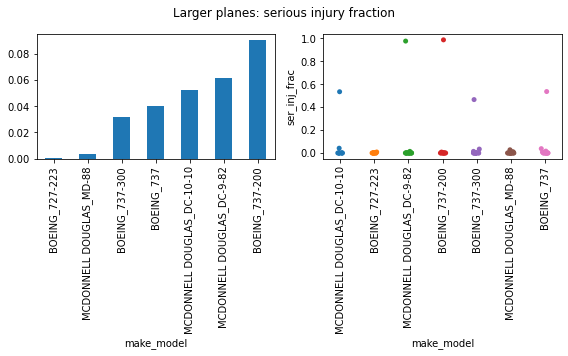

In [12]:
larger_plane_names = larger_plane_counts[larger_plane_counts > 10].index
filtered_larger_planes = larger_planes[larger_planes['make_model'].isin(larger_plane_names)]

fig, ax = plt.subplots(1,2, figsize = (8,5))
fig.suptitle('Larger planes: serious injury fraction')
filtered_larger_planes.groupby('make_model').mean()['ser_inj_frac'].sort_values().plot.bar(ax = ax[0])
sns.stripplot(x = 'make_model', y = 'ser_inj_frac', data = filtered_larger_planes, ax = ax[1])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()


**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

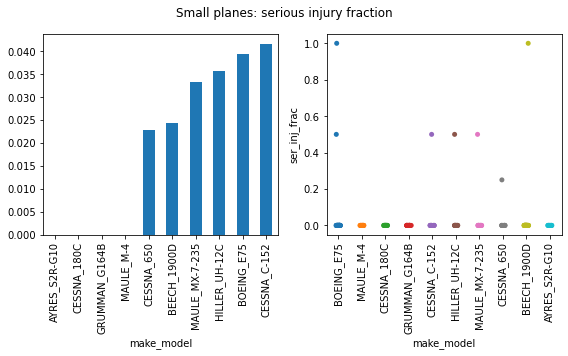

In [13]:
small_plane_counts = small_planes['make_model'].value_counts()
small_plane_counts[small_plane_counts > 10].index

small_plane_names = small_plane_counts[small_plane_counts > 10].index
filtered_small_planes = small_planes[small_planes['make_model'].isin(small_plane_names)]

lowest10smallplanesnames = filtered_small_planes.groupby('make_model').mean()['ser_inj_frac'].sort_values().nsmallest(10).index
lowest10smallplanes_df = small_planes[small_planes['make_model'].isin(lowest10smallplanesnames)]

fig, ax = plt.subplots(1,2, figsize = (8,5))
fig.suptitle('Small planes: serious injury fraction')
lowest10smallplanes_df.groupby('make_model').mean()['ser_inj_frac'].sort_values().plot.bar(ax = ax[0])
sns.stripplot(x = 'make_model', y = 'ser_inj_frac', data = lowest10smallplanes_df, ax = ax[1])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [14]:
# the student can recommend various model/makes
# ideally they should also point out the rather low number of sample points with a nonzero serious injury fraction on models
# i.e. some notion of qualifying their findings with a caveat

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

*Looking at some of the columns listed above. This is the level of analysis expected.*

**Weather Condition**

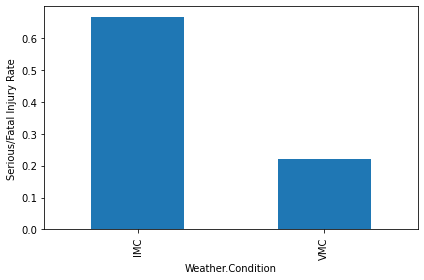

In [15]:
fig, ax = plt.subplots()
air_df.groupby('Weather.Condition').mean()['ser_inj_frac'].plot.bar(ax = ax)
ax.set_ylabel('Serious/Fatal Injury Rate')
plt.tight_layout()
plt.savefig('weathercond_inj.png')
            

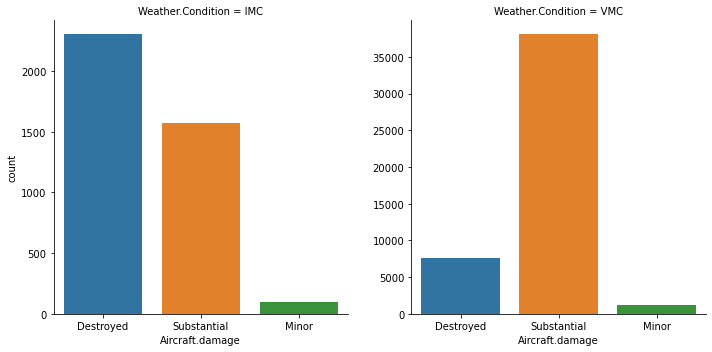

In [16]:
sns.catplot(x = 'Aircraft.damage', col = 'Weather.Condition', kind = 'count', data =air_df, sharey = False)

In [17]:
# DISCUSSION
# these will be more free-form as it depends on how the student wishes to analyze each aspect of the data and the 
# relations they come up with.

# E.g. below for Weather.Condition
"""
The vast majority of accidents logged have occurred under VMC (Visual Meterological conditions) which is not surprising
given that this constitutes the usual conditions for any given flight. However, one can see that under IMC (Instrument
Meteorological Conditions -- where flight control is based purely on instrument readings due to bad weather
and/or visual conditions), when an accident occurs there is a higher likelihood that the aircraft is destroyed
and that there is a higher likelihood of serious/fatal injuries than under VMC.

"""

'\nThe vast majority of accidents logged have occurred under VMC (Visual Meterological conditions) which is not surprising\ngiven that this constitutes the usual conditions for any given flight. However, one can see that under IMC (Instrument\nMeteorological Conditions -- where flight control is based purely on instrument readings due to bad weather\nand/or visual conditions), when an accident occurs there is a higher likelihood that the aircraft is destroyed\nand that there is a higher likelihood of serious/fatal injuries than under VMC.\n\n'

**Engine Type and Fatal Injuries / Serious Damage**

In [18]:
engine_type_stats = air_df.groupby('Engine.Type').agg(['count', 'mean'])['ser_inj_frac']
engine_type_stats

,count,mean
Engine.Type,,
Reciprocating,46312,0.259823
Turbo Fan,1060,0.101310
Turbo Jet,295,0.252433
Turbo Prop,2387,0.305898
Turbo Shaft,1542,0.301049


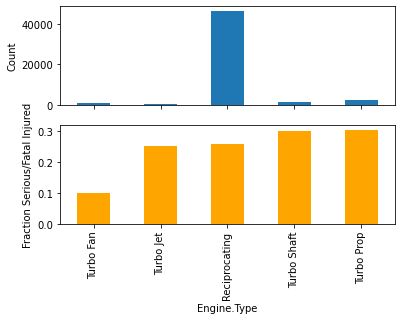

In [22]:
fig, ax = plt.subplots(2,1, sharex = True)
engine_type_stats.sort_values(by = 'mean')['count'].plot.bar(ax = ax[0]) 
engine_type_stats.sort_values(by = 'mean')['mean'].plot.bar(ax = ax[1], color = 'orange') 
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Fraction Serious/Fatal Injured')
plt.savefig('eng_type_inj.png')

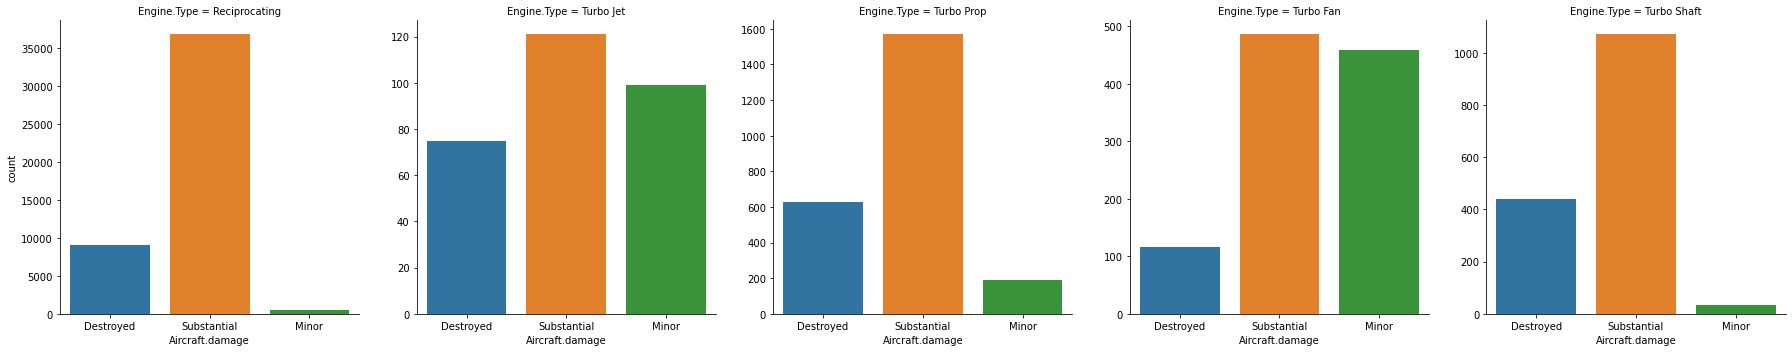

In [20]:
sns.catplot(x = 'Aircraft.damage', col = 'Engine.Type', kind = 'count', data =air_df, sharey = False)
plt.savefig('engine_type.png')

In [21]:
# discussion here

"""
Turbo Fan engines seem to have both the lowest rate of total destruction in an accident as well as the lowest fraction 
of serious/fatally injured passengers. 

The other engine types all have similar rates of serious/fatally injuries although one can see that the
reciprocating engine (the type of engine with the highest representation in the dataset) has a lower rate of complete aircraft destruction. 

"""

'\nTurbo Fan engines seem to have both the lowest rate of total destruction in an accident as well as the lowest fraction \nof serious/fatally injured passengers. \n\nThe other engine types all have similar rates of serious/fatally injuries although one can see that the\nreciprocating engine (the type of engine with the highest representation in the dataset) has a lower rate of complete aircraft destruction. \n\n'

**Number of Engines and Fatal Injuries / Serious Damage**

In [22]:
# check to see if you have enough counts for aggregating statistics

air_df.groupby('Number.of.Engines').count()['N_passenger']

Number.of.Engines
1.0    44405
2.0     6751
3.0      219
4.0      221
Name: N_passenger, dtype: int64

<AxesSubplot:xlabel='Number.of.Engines', ylabel='ser_inj_frac'>

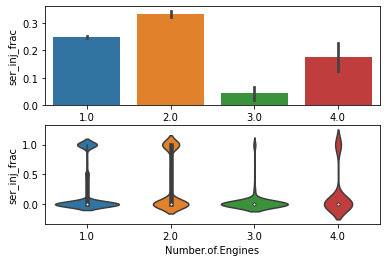

In [23]:
fig, ax = plt.subplots(2,1)
sns.barplot(x = 'Number.of.Engines', y = 'ser_inj_frac', data = air_df, ax = ax[0])
sns.violinplot(x = 'Number.of.Engines', y = 'ser_inj_frac', data = air_df, ax = ax[1])

In [24]:
# discussion here

"""
The bimodal distributions show that we either have near zero serious/fatally injury rates or a high (near unity) fraction. 
Looking at the distributions and mean, we can see that the risk of serious/fatal injuries for the three engine planes 
involved in accidents is significantly lower than the airplanes with other engine quantities. 

In particular, we can see that there are very few accidents involving 3 engines that resulted in a high fraction of 
serious/fatal injuries.

"""

'\nThe bimodal distributions show that we either have near zero serious/fatally injury rates or a high (near unity) fraction. \nLooking at the distributions and mean, we can see that the risk of serious/fatal injuries for the three engine planes \ninvolved in accidents is significantly lower than the airplanes with other engine quantities. \n\nIn particular, we can see that there are very few accidents involving 3 engines that resulted in a high fraction of \nserious/fatal injuries.\n\n'